<a href="https://colab.research.google.com/github/mkorob/NovelAnalysis/blob/main/GoneWithTheWind_Lemmatized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gone With The Wind Character Analysis

Summary of what this notebook does to insert later.


## 0. Preliminaries

In [1]:
import requests
import pandas as pd
import nltk
from nltk import pos_tag, ne_chunk
from nltk.tokenize import word_tokenize
import re
from bs4 import BeautifulSoup

In [2]:
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('punkt')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

## 1. Load Gone With The Wind Text from Gutenberg


In [3]:
# URL of "Gone with the Wind" on Project Gutenberg
url = "https://gutenberg.net.au/ebooks02/0200161.txt"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Extract the content of the book
    content = response.text

    # Remove Project Gutenberg's header and footer
    start_index = content.find("CHAPTER I")
    end_index = content.find("THE END")
    content = content[start_index:end_index]

    # Display the first 500 characters of the content
    print(content[:500])
else:
    print("Failed to retrieve the book from Project Gutenberg.")

CHAPTER I


Scarlett O'Hara was not beautiful, but men seldom realized it when
caught by her charm as the Tarleton twins were.  In her face were
too sharply blended the delicate features of her mother, a Coast
aristocrat of French descent, and the heavy ones of her florid
Irish father.  But it was an arresting face, pointed of chin,
square of jaw.  Her eyes were pale green without a touch of hazel,
starred with bristly black lashes and slightly tilted at the ends.
Above them, her thick black bro


In [4]:
#check the start and the end of the novel
print(f"The Start of the GTTW : {content[:100]}")
print(f"The End of the GTTW : {content[-100:]}")

The Start of the GTTW : CHAPTER I


Scarlett O'Hara was not beautiful, but men seldom realized it when
caught by her charm a
The End of the GTTW : it then.
Tomorrow, I'll think of some way to get him back.  After all,
tomorrow is another day."






## 2. Extract Main Characters

To analyze interactions, we need to map the named entities in the text to the names of the main characters. Here, we make a list of all characters in the novel the way they are referred to in a novel and map them to a unique list of characters in the novel. (e.g. "Catherine", "Cathy", -> "Catherine").

In [31]:
import spacy

In [ ]:
def extract_characters(text):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    named_entities = set()
    for ent in doc.ents:
        if ent.label_ in ["PERSON"]:
            named_entities.add(ent.text)

    return sorted(named_entities)

In [ ]:
len(content)

2340566

In [ ]:
#Spacy NER's extractor needs shorter texts so we split in thirds
thir_content = int(len(content)/3)
characters1 = extract_characters(content[:thir_content])
characters2 = extract_characters(content[thir_content:(thir_content*2)])
characters3 = extract_characters(content[(thir_content*2):])

In [ ]:
characters = set(characters1) | set(characters2) | set(characters3)

In [ ]:
characters = [c for c in list(characters) if c[0].isupper()]

In [ ]:
len(characters)

777

In [ ]:
characters = sorted(characters)

In [ ]:
#remove any characters that are subsets of one another (e.g. no need for Charles and Charles Hamilton)
unique_characters = set()
for name in characters:
    if not any(f"{n.strip()} " in name.strip() or f"{n.strip()}\n" in name.strip() for n in unique_characters):
        unique_characters.add(name)

In [ ]:
len(unique_characters)

534

In [ ]:
#export the dataframe to CSV and manually match characters
pd.DataFrame(characters).to_csv("possible_characters.csv")

In [ ]:
#export the dataframe to CSV and manually match characters
pd.DataFrame(unique_characters).to_csv("possible_reduced_characters_v2.csv")

In [5]:
#import the completed list
characters = pd.read_excel("/content/possible_reduced_characters_v2 (1).xlsx")

In [6]:
#this is old output, the new one should have two columns, one for name as in book, the second for the "real name"
characters = characters[['character', 'character_real']].loc[characters['character_real'] != "remove", :].reset_index(drop = True)

In [7]:
characters

character character_real
0           Rosa           Rosa
1        Watling        Watling
2    Kill Ashley         Ashley
3          Darcy          Darcy
4         Ulster         Ulster
..           ...            ...
221  Sadie Belle          Belle
222       Wynder         Wynder
223         Rene           Rene
224        India          India
225         Pork           Pork

[226 rows x 2 columns]

In [8]:
characters['character_real'].unique()

array(['Rosa', 'Watling', 'Ashley', 'Darcy', 'Ulster', 'Scarlett',
       'Bonnie', 'Jeff\nDavis', 'Mammy', 'Merriwether', 'Jack', 'Munroe',
       'Fontaine', 'Pauline', 'Dan Tucker', 'Buck Munroe', 'Rhett',
       'Mick', 'Pharisees', 'Poke', 'Pitty', 'Sam', 'Suellen', 'Bullock',
       'Prissy', 'Susan Elinor', 'Sarah Jane', 'Phillip', 'Melanie',
       'Nathan Bedford Forrest', 'Frank', 'Robillard', 'Will', 'Bub',
       'McRae', 'Johnson', 'Tarleton', 'Henry', 'Burdens', 'Paul Wilson',
       'Doc Fontaine', 'Charles', 'Andy Bonnell', 'Betsy', 'Carreen',
       'Brown', 'Morgan', 'Wade', 'Calverts', 'Emmie', 'Jonas', 'Betty',
       'Archie', 'Cathleen', 'Jane', 'Jerry', 'Dilcey', 'Brenton',
       'Hilton', 'Tom', 'Alex', 'Jim', 'Sylvia', 'Beau', 'Hetty Tarleton',
       'Suzannah Talbot', 'Elsing', 'Lou', 'Boyne', 'Calhoun',
       'Dolly Merriwether', 'Meade', 'John', 'Stuart', 'Caroline Irene',
       'Jeb Stuart', 'Gerald', 'Hugh', 'Melissy', 'Bonnell', 'Wilkerson',
       'T

## 3. Split Text into Narrative and Dialogue

In [9]:
def split_text(text):

    sections = []

    inside_quote = False
    start_index = 0
    end_index = 0
    current_quote_type = "Narrative"
    count_quotations =0

    for i, char in enumerate(text):
        if char == '"' and count_quotations == 0:
            if not inside_quote and text[i+1].isupper():
                #append existing text
                sections.append({ 'text': text[start_index:i].strip(), 'type': "Narrative"})
                #start end
                inside_quote = True
                start_index = i
                current_quote_type = 'Dialogue'
                count_quotations = 1
        elif char == '"' and count_quotations == 1:
            if inside_quote:
                inside_quote = False
                end_index = i
                #append existing text
                sections.append({ 'text': text[start_index:end_index+1].strip(), 'type': "Dialogue"})
                start_index = i +1
                count_quotations = 0
    return sections

In [10]:
#split text into sections
def split_text_into_sections(text):
    sections = []

    for line in text.split('\r\n\r\n'):
        line = line.strip()
        if line:
          if '"' in line:
            sections = sections + split_text(line)
          else:
            sections.append({'text': line, 'type': 'Narrative'})

    df = pd.DataFrame(sections)
    return df

In [11]:
result_df = split_text_into_sections(content)
#filter out empty sections (paragraphs spaces)
result_df = result_df.loc[result_df['text'] != "", ]

In [12]:
result_df

text       type
0      CHAPTER I\n\n\nScarlett O'Hara was not beautif...  Narrative
1      "I know you two don't care about being expelle...   Dialogue
2                                              she said.  Narrative
3      "But what about Boyd?  He's kind of set on get...   Dialogue
5      "Oh, he can read law in Judge Parmalee's offic...   Dialogue
...                                                  ...        ...
13005                         "I won't think of it now,"   Dialogue
13006  she said again, aloud, trying to push\nher mis...  Narrative
13007       "I'll--why, I'll go home to Tara\ntomorrow,"   Dialogue
13008  and her spirits lifted faintly.\n\nShe had gon...  Narrative
13009  "I'll think of it all tomorrow, at Tara.  I ca...   Dialogue

[10450 rows x 2 columns]

In [13]:
#export df to check for any issues
result_df.to_csv("content_df.csv")

In [14]:
result_df.head(n = 50)

text       type
0   CHAPTER I\n\n\nScarlett O'Hara was not beautif...  Narrative
1   "I know you two don't care about being expelle...   Dialogue
2                                           she said.  Narrative
3   "But what about Boyd?  He's kind of set on get...   Dialogue
5   "Oh, he can read law in Judge Parmalee's offic...   Dialogue
6                          answered Brent carelessly.  Narrative
7   "Besides, it don't\nmatter much.  We'd have ha...   Dialogue
9                                              "Why?"   Dialogue
11  "The war, goose!  The war's going to start any...   Dialogue
13        "You know there isn't going to be any war,"   Dialogue
14                              said Scarlett, bored.  Narrative
15  "It's all just talk.  Why, Ashley Wilkes and h...   Dialogue
17                         "Not going to be any war!"   Dialogue
18  cried the twins indignantly, as though\nthey h...  Narrative
19  "Why, honey, of course there's going to be a w...   Dialogue
20                                       said Stuart.  Narrative
21  "The Yankees may be scared of us, but after th...   Dialogue
22         Scarlett made a mouth of bored impatience.  Narrative
23  "If you say 'war' just once more, I'll go in t...   Dialogue
24  She meant what she said, for she could never l...  Narrative
25  "What did your mother say about you two being ...   Dialogue
26  The boys looked uncomfortable, recalling their...  Narrative
27                                            "Well,"   Dialogue
28  said Stuart, "she hasn't had a chance to say a...  Narrative
29  "Didn't she say anything when you got home las...   Dialogue
31  "We were in luck last night.  Just before we g...   Dialogue
33                  "Do you suppose she'll hit Boyd?"   Dialogue
34  Scarlett, like the rest of the\nCounty, could ...  Narrative
35  "Of course she won't hit Boyd.  She never did ...   Dialogue
36            said Stuart, proud of his six feet two.  Narrative
37  "That's why we left him\nat home to explain th...   Dialogue
39  "Will your mother ride the new horse to the Wi...   Dialogue
41  "She wants to, but Pa says he's too dangerous....   Dialogue
43                 "I hope it doesn't rain tomorrow,"   Dialogue
44                                     said Scarlett.  Narrative
45  "It's rained\nnearly every day for a week.  Th...   Dialogue
47     "Oh, it'll be clear tomorrow and hot as June,"   Dialogue
48                                       said Stuart.  Narrative
49  "Look at that sunset.  I never saw one redder....   Dialogue
50  They looked out across the endless acres of Ge...  Narrative
51  "Be careful!  Be careful!  We had you once.  W...   Dialogue
52  To the ears of the three on the porch came the...  Narrative
53                                           "Yas'm,"   Dialogue
54  and there were sounds of footsteps going\nout ...  Narrative
55                 "Look, Scarlett.  About tomorrow,"   Dialogue
56                                        said Brent.  Narrative
57  "Just because\nwe've been away and didn't know...   Dialogue
59  "Well, I have!  How did I know you all would b...   Dialogue
61                                "You a wallflower!"   Dialogue
62                     The boys laughed uproariously.  Narrative

##4. Match Entities between Dialogue Sections

In [15]:
def match_entities(text, text_type, characters):
    if text_type == "Narrative":
        ent_out = []
        for index, row in characters.iterrows():
            entity = row['character']
            matches = re.finditer(re.escape(entity), text)
            for match in matches:
                ent_out.append((match.start(), match.end(), row['character_real']))
        ent_out.sort(key=lambda x: x[0])
        #return all characters unless they were just mentioned before
        return [ent_out[i][2] for i in range(len(ent_out)) if i == 0 or ent_out[i][2] != ent_out[i - 1][2]]

    else:
        return None


result_df['Entities'] = result_df.apply(lambda row: match_entities(row['text'], row['type'], characters), axis=1)

In [16]:
result_df.head(n=50)

text       type  \
0   CHAPTER I\n\n\nScarlett O'Hara was not beautif...  Narrative   
1   "I know you two don't care about being expelle...   Dialogue   
2                                           she said.  Narrative   
3   "But what about Boyd?  He's kind of set on get...   Dialogue   
5   "Oh, he can read law in Judge Parmalee's offic...   Dialogue   
6                          answered Brent carelessly.  Narrative   
7   "Besides, it don't\nmatter much.  We'd have ha...   Dialogue   
9                                              "Why?"   Dialogue   
11  "The war, goose!  The war's going to start any...   Dialogue   
13        "You know there isn't going to be any war,"   Dialogue   
14                              said Scarlett, bored.  Narrative   
15  "It's all just talk.  Why, Ashley Wilkes and h...   Dialogue   
17                         "Not going to be any war!"   Dialogue   
18  cried the twins indignantly, as though\nthey h...  Narrative   
19  "Why, honey, of course there's going to be a w...   Dialogue   
20                                       said Stuart.  Narrative   
21  "The Yankees may be scared of us, but after th...   Dialogue   
22         Scarlett made a mouth of bored impatience.  Narrative   
23  "If you say 'war' just once more, I'll go in t...   Dialogue   
24  She meant what she said, for she could never l...  Narrative   
25  "What did your mother say about you two being ...   Dialogue   
26  The boys looked uncomfortable, recalling their...  Narrative   
27                                            "Well,"   Dialogue   
28  said Stuart, "she hasn't had a chance to say a...  Narrative   
29  "Didn't she say anything when you got home las...   Dialogue   
31  "We were in luck last night.  Just before we g...   Dialogue   
33                  "Do you suppose she'll hit Boyd?"   Dialogue   
34  Scarlett, like the rest of the\nCounty, could ...  Narrative   
35  "Of course she won't hit Boyd.  She never did ...   Dialogue   
36            said Stuart, proud of his six feet two.  Narrative   
37  "That's why we left him\nat home to explain th...   Dialogue   
39  "Will your mother ride the new horse to the Wi...   Dialogue   
41  "She wants to, but Pa says he's too dangerous....   Dialogue   
43                 "I hope it doesn't rain tomorrow,"   Dialogue   
44                                     said Scarlett.  Narrative   
45  "It's rained\nnearly every day for a week.  Th...   Dialogue   
47     "Oh, it'll be clear tomorrow and hot as June,"   Dialogue   
48                                       said Stuart.  Narrative   
49  "Look at that sunset.  I never saw one redder....   Dialogue   
50  They looked out across the endless acres of Ge...  Narrative   
51  "Be careful!  Be careful!  We had you once.  W...   Dialogue   
52  To the ears of the three on the porch came the...  Narrative   
53                                           "Yas'm,"   Dialogue   
54  and there were sounds of footsteps going\nout ...  Narrative   
55                 "Look, Scarlett.  About tomorrow,"   Dialogue   
56                                        said Brent.  Narrative   
57  "Just because\nwe've been away and didn't know...   Dialogue   
59  "Well, I have!  How did I know you all would b...   Dialogue   
61                                "You a wallflower!"   Dialogue   
62                     The boys laughed uproariously.  Narrative   

                                             Entities  
0   [Scarlett, Tarleton, Stuart, Brent, Tarleton, ...  
1                                                None  
2                                                  []  
3                                                None  
5                                                None  
6                                             [Brent]  
7                                                None  
9                                                None  
11                                               None  
13                  

In [17]:
convo_df =  pd.DataFrame(data = {
        'Character1': [],
        'Character2': [],
        'StartIndex': [],
        'EndIndex': [],
        'text_out': []
    })

convo_characters = []
convo_start = None
convo_end = None
text_out = ""
for idx, row in result_df.iterrows():
  if row['type'] == "Dialogue":
    convo_end = idx
    text_out += row['text']
    if convo_start is None:
      convo_start = idx

  else:
    if row['type'] == "Narrative":
      for entity in row['Entities']:
        if entity not in convo_characters and convo_characters is not None:
            convo_characters.append(entity)
        if len(convo_characters) > 2:
            new_row = pd.DataFrame(data= {'Character1': convo_characters[0], 'Character2': convo_characters[1], 'StartIndex': convo_start, 'EndIndex': convo_end, 'text_out': text_out}, index=[0])
            convo_df = pd.concat([convo_df, new_row])
            convo_characters = [convo_characters[-1]]
            convo_start = None
            text_out = ""

In [18]:
convo_df = convo_df.dropna()

In [19]:
def merge_characters(char1, char2):
  list_out = "_".join(sorted([char1, char2]))
  return str(list_out)

In [20]:
convo_df['characters'] = convo_df.apply(lambda row: merge_characters(row['Character1'], row['Character2']), axis=1)

In [21]:
convo_df['character_count'] = convo_df['text_out'].apply(len)

In [22]:
convo_df

Character1 Character2 StartIndex EndIndex  \
0    Scarlett      Brent          1       19   
0      Stuart   Scarlett         21       27   
0         Tom   Fontaine         29       33   
0    Beatrice   Tarleton         35       35   
0      Stuart   Scarlett         37       49   
..        ...        ...        ...      ...   
0      Ashley   Scarlett      12887    12897   
0       Rhett      Belle      12899    12911   
0      Ashley      Rhett      12913    12947   
0      Gerald      Rhett      12949    12971   
0      Ashley      Rhett      12973    13007   

                                             text_out         characters  \
0   "I know you two don't care about being expelle...     Brent_Scarlett   
0   "The Yankees may be scared of us, but after th...    Scarlett_Stuart   
0   "Didn't she say anything when you got home las...       Fontaine_Tom   
0   "Of course she won't hit Boyd.  She never did ...  Beatrice_Tarleton   
0   "That's why we left him\nat home to explain th...    Scarlett_Stuart   
..                                                ...                ...   
0   "But love can't wear out!""Yours for Ashley di...    Ashley_Scarlett   
0   "It was so obvious that we were meant for each...        Belle_Rhett   
0   "But then, there was Bonnie and I saw that eve...       Ashley_Rhett   
0   "Don't be a fool, Rhett!  I can make--""Don't ...       Gerald_Rhett   
0   "A glamor to it--a perfection, a symmetry like...       Ashley_Rhett   

    character_count  
0              1015  
0               971  
0              1302  
0               126  
0               714  
..              ...  
0              1702  
0              2113  
0              2358  
0              1676  
0              1796  

[1436 rows x 7 columns]

<Axes: xlabel='characters'>

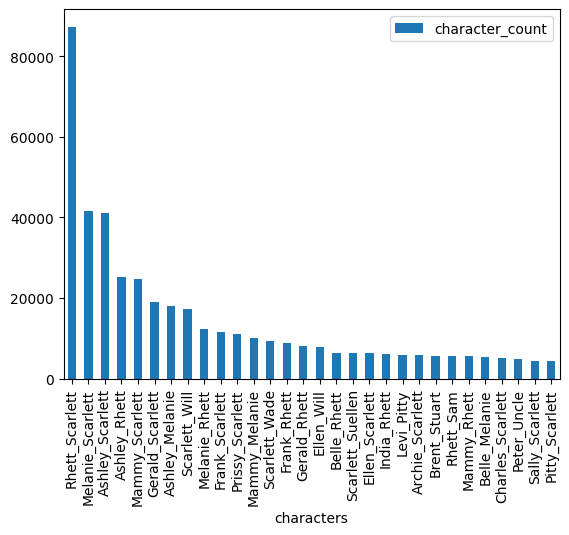

In [23]:
convo_df.groupby(['characters']).agg({'character_count': 'sum'}).sort_values(by='character_count', ascending=False).head(n=30).plot(kind = "bar")

In [24]:
main_interactions  = ["Rhett_Scarlett", "Ashley_Scarlett", "Melanie_Scarlett", "Gerald_Scarlett"]

In [25]:
main_characters = ["Scarlett", "Rhett", "Ashley", "Gerald", "Melanie"]

In [26]:
convo_df_main = convo_df.loc[convo_df['characters'].isin(main_interactions), :].reset_index(drop = True)

<Axes: xlabel='characters'>

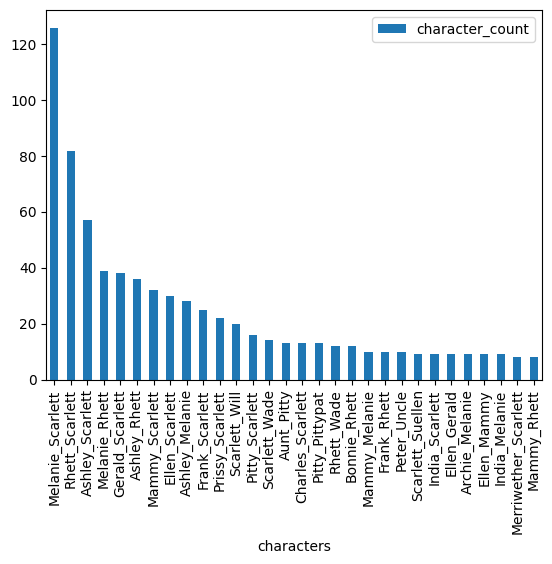

In [27]:
convo_df.groupby(['characters']).agg({'character_count': 'count'}).sort_values(by='character_count', ascending=False).head(n=30).plot(kind = "bar")

## 5. Pre-process Text for Regressions and LDA


### 5.1 Clean text from stopwords and other irrelevant words

In [28]:
import pandas as pd

# Load the Excel file into a pandas DataFrame
df = pd.read_excel('possible_reduced_characters_v2 (1).xlsx', header=None)

# Filter the DataFrame to exclude rows where the third column contains "remove"
filtered_df = df[df.iloc[:, 2] != 'remove']

# Extract unique character names from the first column
character_names_all = filtered_df.iloc[:, 1].unique()

row_to_remove = 0
if row_to_remove < len(character_names_all):
    character_names_all = list(character_names_all)
    character_names_all.pop(row_to_remove)

# Print the extracted character names
print(character_names_all)

['Rosa', 'Watling', 'Kill Ashley', 'Darcy', 'Ulster', 'Scarlert', 'Eugenie Victoria', 'Jeff\nDavis', 'Tell Mammy', 'Merriwether', 'Jack', 'Munroe', 'Scarlett', 'Mama Fontaine', 'Pauline', 'Dan Tucker', 'Unless Ashley', 'Buck Munroe', 'Fortunately Scarlett', 'Butler', 'Mick', 'Katie\nScarlett', 'Pharisees', 'Poke', 'Pitty', 'Big Sam', 'Sue', 'Bullock', 'Damn Prissy', 'Susan Elinor', 'Sarah Jane', 'Sam', 'Phil', 'Melly', 'Nathan Bedford Forrest', 'Sometimes Frank', 'Pierre Robillard', 'All Scarlett', 'Benteen', 'Bub', 'Mellie', 'Melanie', 'McRae', 'Johnson', 'Tarleton', 'Henry', 'Burdens', 'Paul Wilson', 'Generally Scarlett', 'Doc Fontaine', 'Dalton', 'Andy Bonnell', 'Suellen', 'Mammy, Cookie', 'Betsy', 'Small Carreen', 'Brown', 'Morgan', 'Wade', 'Calverts', 'Philip', 'Emmie', 'Kennedy', 'Jonas', 'Slattery', 'Betty', 'Bulloch', 'Off Scarlett', 'Calvert', 'Jane', 'Jerry', 'Dilcey', 'Mel--', 'Brenton', 'Yankee Hilton', 'Cathleen', 'Mees Scarlett', 'Tom', 'Mammy--Mammy', 'Wheeler', 'Alex.',

In [29]:
tokenizer_reg = nltk.RegexpTokenizer(r"\w+")

In [32]:
nlp = spacy.load("en_core_web_sm")

In [33]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
tokenizer_reg = nltk.RegexpTokenizer(r"\w+")

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Manually add additional stopwords
additional_stopwords = [name.lower() for name in character_names_all]
custom_list_of_extra_stopwords = ["n't", "'s", "'m", "'ve", "'em", "'ll", "'t", "'d", "us", "'re", "there's", "there're", "they'd", "they've", "'twill", "s", "oh", "ca", "wo"]
# Combine NLTK stopwords with additional stopwords
all_stopwords = set(stopwords.words('english') + custom_list_of_extra_stopwords)

#lemmatize words
def lemmatize_tokens(text):
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc]
    return lemmatized_tokens

# Define a function to remove stopwords from text
def remove_stopwords(text):

    # 1. Tokenize the text to remove stopwords
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word.lower() in all_stopwords]
    # Join tokens back into a string
    text = ' '.join(tokens_without_sw)

    #2. Remove punctuation
    tokens_without_punct = tokenizer_reg.tokenize(text.lower())

    text = ' '.join(tokens_without_punct)

    #punctuation_pattern = re.compile(r'[^\w\s]')
    # Remove punctuation marks from the text
    #text = punctuation_pattern.sub(' ', text.lower())

    #3. Remove names
    for substring in additional_stopwords:
        text = text.replace(substring, '')

    #4. Lemmatize text
    lemma_text = " ".join(lemmatize_tokens(text))

    return text


# Assuming convo_df_main is your DataFrame and 'text_out' is the column containing text
# Apply the remove_stopwords function to the 'text_out' column
convo_df_main['text_out_processed'] = convo_df_main['text_out'].apply(remove_stopwords)

# Print the DataFrame to see the result
convo_df_main['text_out_processed'].head(60)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                             careful careful take back
1      something important tell hardly know say near...
2                    none county touch state well missy
3     reason bought  asked buy well use buying  goin...
4     twelve oaks usual cade  settled  set gallery s...
5     well speak asked kindly sisters said hoped not...
6     sorry daughter nothing child lots x mother fif...
7     wish quit pushing want tara old plantation pla...
8     young come love land getting away irish child ...
9                     brat baptized yes dead poor thing
10    ley idea love could know always acted y ladyli...
11    getting another overseer would cheating eyetee...
12    put tray come lace tighter try eat little afte...
13      remember tiful day till die perhaps wedding day
14    mrs  takes toss every hunt breaks collar bone ...
15    drive  wear get horses yet course right right ...
16                looks knew looked like without shimmy
17    live barbecue till afternoon course attent

In [34]:
convo_df_main.head()

Character1 Character2 StartIndex EndIndex  \
0     Gerald   Scarlett         51       51   
1    Melanie   Scarlett        327      329   
2     Gerald   Scarlett        335      337   
3   Scarlett     Gerald        359      361   
4   Scarlett     Gerald        363      373   

                                            text_out        characters  \
0  "Be careful!  Be careful!  We had you once.  W...   Gerald_Scarlett   
1  "Scarlett, I have something so important\nto t...  Melanie_Scarlett   
2  "There's none in the County can touch you, nor...   Gerald_Scarlett   
3  "And the only reason you\nbought her was becau...   Gerald_Scarlett   
4  "How are they all over at Twelve Oaks?""About ...   Gerald_Scarlett   

   character_count                                 text_out_processed  
0               73                          careful careful take back  
1              173   something important tell hardly know say near...  
2               75                 none county touch state well missy  
3              306  reason bought  asked buy well use buying  goin...  
4              748  twelve oaks usual cade  settled  set gallery s...

### 5.2 Pre-processing for LDA

In [42]:
def count_tokens(text):
    # Split the text by whitespace to get tokens
    tokens = text.split()
    # Return the count of tokens
    return len(tokens)

# Apply the function to each row in the 'text_out_processed' column
convo_df_main['token_count'] = convo_df_main['text_out_processed'].apply(count_tokens)

In [43]:
import pandas as pd

# Assuming convo_df_main is your existing DataFrame

# Create a new DataFrame with only the specified columns
new_df = convo_df_main[['characters', 'token_count', 'text_out_processed']].copy()

# Display the new DataFrame
print(new_df)

           characters  token_count  \
0     Gerald_Scarlett            4   
1    Melanie_Scarlett           10   
2     Gerald_Scarlett            6   
3     Gerald_Scarlett           23   
4     Gerald_Scarlett           56   
..                ...          ...   
298  Melanie_Scarlett           14   
299  Melanie_Scarlett            3   
300  Melanie_Scarlett           43   
301    Rhett_Scarlett          249   
302   Ashley_Scarlett          136   

                                    text_out_processed  
0                            careful careful take back  
1     something important tell hardly know say near...  
2                   none county touch state well missy  
3    reason bought  asked buy well use buying  goin...  
4    twelve oaks usual cade  settled  set gallery s...  
..                                                 ...  
298  good night promise anything darling   kind lov...  
299                                  woman friend ever  
300  want word either must cry

In [44]:
import pandas as pd

# Assuming new_df is your DataFrame containing the columns characters, token_count, and text_out_processed

# Counting rows where token_count is less than 9 or equal to 9
count = len(new_df[(new_df['token_count'] < 9) | (new_df['token_count'] == 9)])

print("Number of rows where token_count is less than 9 or equal to 9:", count)

Number of rows where token_count is less than 9 or equal to 9: 102


In [45]:
import pandas as pd

# Assuming new_df is your DataFrame containing the columns characters, token_count, and text_out_processed

# Filter rows where token_count is 9 or less
filtered_df = new_df[new_df['token_count'] <= 9]

# Count occurrences of each word in the "characters" column
word_counts = filtered_df['characters'].value_counts()

# Print the counts
print("Number of rows with 9 or less tokens for each word in 'characters' column:")
print(word_counts)

Number of rows with 9 or less tokens for each word in 'characters' column:
characters
Melanie_Scarlett    53
Ashley_Scarlett     18
Rhett_Scarlett      16
Gerald_Scarlett     15
Name: count, dtype: int64


In [46]:
# Get unique values in the "characters" column
unique_characters = new_df['characters'].unique()

# Create separate DataFrames with different variable names
for character in unique_characters:
    globals()[f'df_{character.replace(" ", "_")}'] = new_df[new_df['characters'] == character].copy()

# Now, you have separate DataFrames named df_Gerald_Scarlett, df_Melanie_Scarlett, df_Rhett_Scarlett, and df_Ashley_Scarlett

In [47]:
df_Ashley_Scarlett

characters  token_count  \
10   Ashley_Scarlett           54   
13   Ashley_Scarlett            8   
17   Ashley_Scarlett           10   
20   Ashley_Scarlett           13   
26   Ashley_Scarlett            2   
28   Ashley_Scarlett            5   
61   Ashley_Scarlett            2   
64   Ashley_Scarlett            1   
78   Ashley_Scarlett           10   
80   Ashley_Scarlett           10   
95   Ashley_Scarlett          141   
96   Ashley_Scarlett            2   
97   Ashley_Scarlett            8   
103  Ashley_Scarlett          228   
143  Ashley_Scarlett            5   
157  Ashley_Scarlett           19   
166  Ashley_Scarlett            3   
168  Ashley_Scarlett          450   
169  Ashley_Scarlett           23   
176  Ashley_Scarlett           18   
179  Ashley_Scarlett           36   
181  Ashley_Scarlett           83   
182  Ashley_Scarlett           18   
183  Ashley_Scarlett           14   
184  Ashley_Scarlett          259   
185  Ashley_Scarlett          102   
187  Ashley_Scarlett           38   
188  Ashley_Scarlett           15   
190  Ashley_Scarlett           37   
192  Ashley_Scarlett           12   
193  Ashley_Scarlett           76   
196  Ashley_Scarlett           57   
199  Ashley_Scarlett           23   
200  Ashley_Scarlett           82   
201  Ashley_Scarlett            5   
203  Ashley_Scarlett          367   
206  Ashley_Scarlett            4   
213  Ashley_Scarlett            3   
215  Ashley_Scarlett           13   
224  Ashley_Scarlett            5   
247  Ashley_Scarlett            2   
255  Ashley_Scarlett           72   
257  Ashley_Scarlett          173   
258  Ashley_Scarlett           73   
259  Ashley_Scarlett            3   
261  Ashley_Scarlett           92   
265  Ashley_Scarlett           29   
266  Ashley_Scarlett           21   
274  Ashley_Scarlett           37   
280  Ashley_Scarlett           44   
281  Ashley_Scarlett            9   
282  Ashley_Scarlett           47   
284  Ashley_Scarlett           91   
293  Ashley_Scarlett           48   
294  Ashley_Scarlett            6   
297  Ashley_Scarlett            9   
302  Ashley_Scarlett          136   

                                    text_out_processed  
10   ley idea love could know always acted y ladyli...  
13     remember tiful day till die perhaps wedding day  
17   live barbecue till afternoon course attentive ...  
20   let hot headed let war misery world caused war...  
26                                          baby house  
28                         want good time jine cavalry  
61                                           dear wife  
64                                               dixie  
78   forgive saying  know love mad silly go porch s...  
80   gentlemen georgia troops well can t get along ...  
95   perhaps old march ride shoot mrs  kindly lent ...  
96                                             god ley  
97            news news know fer sartin lady soon tell  
103  could tonight  boy home luck giggle pull away ...  
143                   like understands feel done thing  
157  mrs wilkes bother husband captured first manas...  
166                                beloved coming home  
168  skunk ever one become wonder wonder become tar...  
169  nothing left nothing left nothing love nothing...  
176  ah difference even though poor still feel like...  
179  loved hell permit come atlanta get tax money l...  
181  thing wanted tell change subject baring loving...  
182  figger way pa gone  nun llen left course could...  
183  tiful voice anyone pa glad ley rather priest r...  
184  never said helpless turtle back wilkes family ...  
185  ley must come atlanta need help badly look mil...  
187  manager offered half interest told already mad...  
188  ley could refuse done ungrateful make appear h...  
190  talked going new york thought nothing atlanta ...  
192  thank darling would crowd get house ley say ye...  
193  england recognized jeff  commandeered cotton g...  
196  nothing kind earthly good would le

In [48]:
import pandas as pd

# List of DataFrames
dataframes = [df_Ashley_Scarlett, df_Rhett_Scarlett, df_Gerald_Scarlett, df_Melanie_Scarlett]
for df in dataframes:
    # Drop the 'characters' column
    df.drop(columns=['characters'], inplace=True)

    # Reset the index
    df.reset_index(drop=True, inplace=True)

    # Print the DataFrame after removing the 'characters' column and resetting the index
    print(df)

    token_count                                 text_out_processed
0            54  ley idea love could know always acted y ladyli...
1             8    remember tiful day till die perhaps wedding day
2            10  live barbecue till afternoon course attentive ...
3            13  let hot headed let war misery world caused war...
4             2                                         baby house
5             5                        want good time jine cavalry
6             2                                          dear wife
7             1                                              dixie
8            10  forgive saying  know love mad silly go porch s...
9            10  gentlemen georgia troops well can t get along ...
10          141  perhaps old march ride shoot mrs  kindly lent ...
11            2                                            god ley
12            8           news news know fer sartin lady soon tell
13          228  could tonight  boy home luck giggle pull away

In [49]:
num_rows = df_Ashley_Scarlett.shape[0]
print("Number of rows in df_Ashley_Scarlett:", num_rows)

Number of rows in df_Ashley_Scarlett: 57


In [50]:
num_rows = df_Rhett_Scarlett.shape[0]
print("Number of rows in df_Rhett_Scarlett:", num_rows)

Number of rows in df_Rhett_Scarlett: 82


In [51]:
num_rows = df_Gerald_Scarlett.shape[0]
print("Number of rows in df_Gerald_Scarlett:", num_rows)

Number of rows in df_Gerald_Scarlett: 38


In [52]:
num_rows = df_Melanie_Scarlett.shape[0]
print("Number of rows in df_Melanie_Scarlett:", num_rows)

Number of rows in df_Melanie_Scarlett: 126


In [53]:
import pandas as pd

def combine_text(df):
    # Group the DataFrame into groups of 10 consecutive rows
    grouped = df.groupby(df.index // 10)

    # Aggregate each group into a single row by concatenating the text
    combined_df = grouped.agg({'text_out_processed': ' '.join, 'token_count': 'sum'}).reset_index(drop=True)

    return combined_df

# Assuming df_Ashley_Scarlett1, df_Ashley_Scarlett2, df_Ashley_Scarlett3, and df_Ashley_Scarlett4 are your dataframes
# Replace these with your actual dataframe names

# Apply the combine_text function to each dataframe
combined_df_Ashley = combine_text(df_Ashley_Scarlett)
combined_df_Rhett = combine_text(df_Rhett_Scarlett)
combined_df_Melanie = combine_text(df_Melanie_Scarlett)
combined_df_Gerald = combine_text(df_Gerald_Scarlett)

# Print the combined DataFrames
print(combined_df_Ashley)
print(combined_df_Rhett)
print(combined_df_Melanie)
print(combined_df_Gerald)

                                  text_out_processed  token_count
0  ley idea love could know always acted y ladyli...          115
1  perhaps old march ride shoot mrs  kindly lent ...          897
2  loved hell permit come atlanta get tax money l...          614
3  england recognized jeff  commandeered cotton g...          635
4  beds dear  downtown time day house helping  ge...          546
5  anything know better never go world good deeds...          346
                                  text_out_processed  token_count
0  husband dead long yes long time almost year ae...          917
1  air hungry crop year ai nobody plow air hungry...         1036
2  put damn put walk  would ever done without gla...         1645
3  god discuss expect answer still love well care...         1606
4  stranger without told word would know house bu...          249
5  man world would care much   seen done without ...          338
6  sat chest big one yes dretfull big claws ah cl...          483
7  ragamuf

### 5.3 Pre-processing for Regression - Text Chunking

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

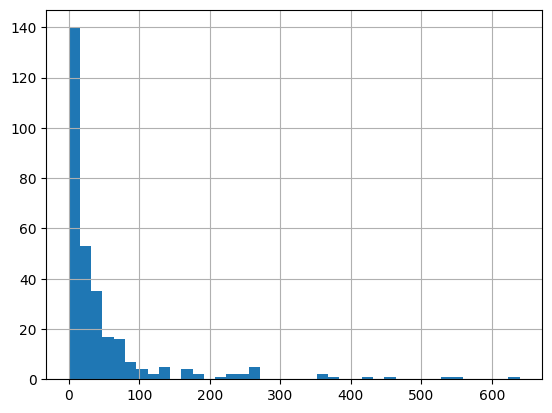

In [177]:
new_df['token_count'].hist(bins = 40)

As there are otherwise not enough rows to perform analysis on, we split the text into chunks of 30 to perform training on.

In [178]:
def split_text(text):
    words = word_tokenize(text)
    result = []
    current_item = []
    current_length = 0

    for word in words:
        if current_length + len(word) + len(current_item) > 10:
            if len(current_item) >= 30:
                result.append(current_item)
                current_item = [word]
                current_length = len(word)
            else:
                current_item += [word]
                current_length += len(word)
        else:
            current_item.append(word)
            current_length += len(word)

    if current_item:
        result.append(current_item)

    return result


def expand_dataframe(df, col_Name):
    rows = []
    for index, row in df.iterrows():
        name = row['characters']
        name_list = row[col_Name]
        for item in name_list:
            rows.append([name, " ".join(item)])

    new_df = pd.DataFrame(rows, columns=['characters', 'Chunk'])
    return new_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [179]:
convo_df_main['Chunks'] = convo_df_main['text_out_processed'].apply(split_text)
df_main_chunked = expand_dataframe(convo_df_main, "Chunks")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [180]:
df_main_chunked

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


characters                                              Chunk
0     Gerald_Scarlett                          careful careful take back
1    Melanie_Scarlett  something important tell hardly know say nearl...
2     Gerald_Scarlett                 none county touch state well missy
3     Gerald_Scarlett  reason bought asked buy well use buying going ...
4     Gerald_Scarlett  twelve oaks usual cade settled set gallery sev...
..                ...                                                ...
668   Ashley_Scarlett  love wear ley never really loved ley certainly...
669   Ashley_Scarlett  knows see need explanations truth plain ever o...
670   Ashley_Scarlett  find cared much believe would killed died love...
671   Ashley_Scarlett  laugh like wanted take care pet give everythin...
672   Ashley_Scarlett  play like child child brave frightened bullhea...

[673 rows x 2 columns]

Now this data can be vectorized:

In [181]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range = (1, 3), max_df=0.9)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [182]:
df_main_chunked['characters'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


characters
Rhett_Scarlett      278
Melanie_Scarlett    183
Ashley_Scarlett     139
Gerald_Scarlett      73
Name: count, dtype: int64

As there is a class imbalance, we first want to select 30 real observations from each group, and then augment the training classes through SMOTE:

In [183]:
def select_equal_groups(group: pd.core.groupby.generic.DataFrameGroupBy, n: int):
    return group.sample(min(n, len(group)), random_state=42)

df_test = df_main_chunked.groupby('characters', group_keys=False)\
          .apply(select_equal_groups, 30)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [184]:
df_train = df_main_chunked[~df_main_chunked.index.isin(df_test.index)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [185]:
print(df_train['characters'].value_counts())
print(df_test['characters'].value_counts())

characters
Rhett_Scarlett      248
Melanie_Scarlett    153
Ashley_Scarlett     109
Gerald_Scarlett      43
Name: count, dtype: int64
characters
Ashley_Scarlett     30
Gerald_Scarlett     30
Melanie_Scarlett    30
Rhett_Scarlett      30
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


As one class is overbalanced, we want to reduce the majority class to 150 so that for Gerald the oversampling is not too much:

In [186]:
df_train = df_train.groupby('characters', group_keys=False)\
          .apply(select_equal_groups, 150)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [187]:
X_train = vectorizer.fit_transform(df_train['Chunk'])
X_test = vectorizer.transform(df_test['Chunk'])
y_train = df_train.characters.reset_index(drop = True)
y_test = df_test.characters.reset_index(drop = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [188]:
y_train.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


characters
Melanie_Scarlett    150
Rhett_Scarlett      150
Ashley_Scarlett     109
Gerald_Scarlett      43
Name: count, dtype: int64

In [189]:
y_test.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


characters
Ashley_Scarlett     30
Gerald_Scarlett     30
Melanie_Scarlett    30
Rhett_Scarlett      30
Name: count, dtype: int64

In [190]:
!pip install imbalanced-learn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [191]:
from imblearn.over_sampling import SMOTE

def smote_upsampling(X, y):
    """
    Perform SMOTE upsampling on the input features and target labels.

    Parameters:
        X (array-like): Input features.
        y (array-like): Target labels.

    Returns:
        X_resampled (array-like): Resampled features.
        y_resampled (array-like): Resampled target labels.
    """
    # Initialize SMOTE object
    smote = SMOTE()

    # Perform SMOTE upsampling
    X_resampled, y_resampled = smote.fit_resample(X, y)

    return X_resampled, y_resampled

# Example usage:
# X_train and y_train are your training features and labels, respectively
X_train_resampled, y_train_resampled = smote_upsampling(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [192]:
print(y_train_resampled.value_counts())

characters
Ashley_Scarlett     150
Gerald_Scarlett     150
Melanie_Scarlett    150
Rhett_Scarlett      150
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##5B. TF-IDF per class statistics

In [193]:
train_df = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names_out())
train_df['y'] = y_train

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [194]:
grouped_train = train_df.groupby('y').sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [195]:
# Find the most popular tokens for each class
top_tokens_train = {}

for class_label, data in grouped_train.iterrows():
    top_tokens_train[class_label] = data.nlargest(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [196]:
top_tokens_train

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'Ashley_Scarlett': ley      2.043528
 know     1.794237
 like     1.702364
 never    1.690153
 would    1.599521
 dear     1.415806
 world    1.361338
 love     1.337652
 money    1.303441
 could    1.185654
 Name: Ashley_Scarlett, dtype: float64,
 'Gerald_Scarlett': daughter      1.391214
 mother        1.018026
 man           0.914769
 oaks honey    0.686277
 cruel war     0.671514
 go            0.660695
 well          0.637253
 marry         0.605382
 oaks          0.601425
 pa            0.600852
 Name: Gerald_Scarlett, dtype: float64,
 'Melanie_Scarlett': darling    2.658928
 know       2.508127
 please     2.381756
 home       2.181890
 think      2.142601
 must       1.924590
 come       1.809222
 get        1.774543
 ley        1.737694
 would      1.727330
 Name: Melanie_Scarlett, dtype: float64,
 'Rhett_Scarlett': go       2.825010
 want     2.258022
 going    2.205006
 like     2.112203
 think    2.034715
 never    2.012493
 would    1.875857
 money    1.866828
 keep     1

In [197]:
from collections import Counter

# Combine all the tokens from top_tokens_train
all_tokens = []
for class_label, tokens in top_tokens_train.items():
    all_tokens.extend(tokens.index)

# Count the occurrences of each token
token_counts = Counter(all_tokens)

# Convert the Counter object to a set
token_set = set(token_counts.items())

print("Set of all tokens and their counts:")
print(token_set)

Set of all tokens and their counts:
{('going', 1), ('must', 1), ('want', 1), ('ley', 2), ('would', 3), ('like', 2), ('money', 2), ('know', 2), ('mother', 1), ('marry', 1), ('dear', 1), ('well', 1), ('daughter', 1), ('go', 2), ('think', 2), ('keep', 1), ('get', 1), ('world', 1), ('oaks honey', 1), ('could', 1), ('please', 1), ('darling', 1), ('come', 1), ('cruel war', 1), ('man', 1), ('never', 2), ('oaks', 1), ('one', 1), ('home', 1), ('love', 1), ('pa', 1)}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [198]:
common_tokens = {token: count for token, count in token_set if count > 1}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [199]:
import numpy as np

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [200]:
common_tokens

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'ley': 2,
 'would': 3,
 'like': 2,
 'money': 2,
 'know': 2,
 'go': 2,
 'think': 2,
 'never': 2}

In [201]:
# Remove common tokens from the vectorizers
common_tokens_indices = [vectorizer.vocabulary_[token] for token in common_tokens]
#vectorizer.vocabulary_ = {token: index for token, index in vectorizer.vocabulary_.items() if index not in common_tokens_indices}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [202]:
X_train_resampled.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(600, 19475)

In [203]:
len(vectorizer.vocabulary_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


19467

In [204]:
#X_train_resampled = np.delete(X_train_resampled.toarray(), common_tokens_indices, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [205]:
#X_test= np.delete(X_test.toarray(), common_tokens_indices, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [206]:
#from scipy.sparse import csr_matrix
#X_train_resampled = csr_matrix(X_train_resampled)
#X_test_resampled = csr_matrix(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [207]:
top_tokens_train['Ashley_Scarlett']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ley      2.043528
know     1.794237
like     1.702364
never    1.690153
would    1.599521
dear     1.415806
world    1.361338
love     1.337652
money    1.303441
could    1.185654
Name: Ashley_Scarlett, dtype: float64

In [208]:
top_tokens_train['Melanie_Scarlett']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


darling    2.658928
know       2.508127
please     2.381756
home       2.181890
think      2.142601
must       1.924590
come       1.809222
get        1.774543
ley        1.737694
would      1.727330
Name: Melanie_Scarlett, dtype: float64

In [209]:
top_tokens_train['Rhett_Scarlett']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


go       2.825010
want     2.258022
going    2.205006
like     2.112203
think    2.034715
never    2.012493
would    1.875857
money    1.866828
keep     1.847964
one      1.690846
Name: Rhett_Scarlett, dtype: float64

In [210]:
top_tokens_train['Gerald_Scarlett']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


daughter      1.391214
mother        1.018026
man           0.914769
oaks honey    0.686277
cruel war     0.671514
go            0.660695
well          0.637253
marry         0.605382
oaks          0.601425
pa            0.600852
Name: Gerald_Scarlett, dtype: float64

##6. Logistic Regression


We perform a GridSearch on the training data

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

#make a list of parameters:
param_grid = {
    'C': [10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']# Penalty term
}

# Initialize and fit logistic regression model
logreg = LogisticRegression(max_iter=1000)
gridsearch = GridSearchCV(logreg, param_grid, cv=KFold(5, shuffle=True, random_state=42), verbose=2, n_jobs=-1)

In [167]:
# Initialize and fit logistic regression model
logregSVC = SVC()
gridsearchSVC = GridSearchCV(logregSVC, param_grid, cv=KFold(5, shuffle=True, random_state=42), verbose=2, n_jobs=-1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [169]:
from sklearn.model_selection import KFold

#make a list of parameters:
param_grid_SVC = {
    'kernel': ['linear'],
    'C': [ 0.1, 1, 10, 100]
}
gridsearchSVC = GridSearchCV(logregSVC, param_grid_SVC, cv=KFold(5, shuffle=True, random_state=42), verbose=2, n_jobs=-1)
gridsearchSVC.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
             verbose=2)

In [123]:
gridsearch.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=2)

Then we take the best results of the grisearch and fit it to the model:

In [124]:
cv_results_df = pd.DataFrame(gridsearch.cv_results_)

In [171]:
cv_results_df_SVC = pd.DataFrame(gridsearchSVC.cv_results_)
cv_results_df_SVC.sort_values(by='mean_test_score', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
1       0.367773      0.018291         0.057017        0.006135       1   
2       0.477719      0.095249         0.078984        0.024781      10   
3       0.353079      0.099611         0.063215        0.028904     100   
0       0.477484      0.069021         0.061348        0.004190     0.1   

  param_kernel                          params  split0_test_score  \
1       linear    {'C': 1, 'kernel': 'linear'}           0.733333   
2       linear   {'C': 10, 'kernel': 'linear'}           0.708333   
3       linear  {'C': 100, 'kernel': 'linear'}           0.708333   
0       linear  {'C': 0.1, 'kernel': 'linear'}           0.225000   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
1           0.725000           0.716667           0.775000           0.641667   
2           0.750000           0.700000           0.766667           0.666667   
3           0.633333           0.683333           0.641667           0.608333   
0           0.233333           0.216667           0.200000           0.191667   

   mean_test_score  std_test_score  rank_test_score  
1         0.718333        0.043269                1  
2         0.718333        0.035901                1  
3         0.655000        0.035978                3  
0         0.213333        0.015456                4

In [125]:
cv_results_df.sort_values(by='mean_test_score', ascending=False)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
3       0.568448      0.136991         0.002642        0.000843      10   
2       0.099895      0.038128         0.004373        0.005314      10   
6       0.109373      0.009602         0.009636        0.004058     100   
7       3.383119      0.839226         0.004171        0.003962     100   
5      22.408994      3.079960         0.004329        0.003491     100   
0      35.722482     20.190651         0.003821        0.003011      10   
4      13.389666     26.007196         0.002240        0.000904     100   
1       9.646125      3.227569         0.002536        0.000652      10   

  param_penalty param_solver  \
3            l2         saga   
2            l2    liblinear   
6            l2    liblinear   
7            l2         saga   
5            l1         saga   
0            l1    liblinear   
4            l1    liblinear   
1            l1         saga   

                                              params  split0_test_score  \
3       {'C': 10, 'penalty': 'l2', 'solver': 'saga'}           0.716667   
2  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}           0.708333   
6  {'C': 100, 'penalty': 'l2', 'solver': 'libline...           0.700000   
7      {'C': 100, 'penalty': 'l2', 'solver': 'saga'}           0.700000   
5      {'C': 100, 'penalty': 'l1', 'solver': 'saga'}           0.650000   
0  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}           0.608333   
4  {'C': 100, 'penalty': 'l1', 'solver': 'libline...           0.633333   
1       {'C': 10, 'penalty': 'l1', 'solver': 'saga'}           0.591667   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
3           0.725000           0.708333           0.783333           0.675000   
2           0.716667           0.708333           0.766667           0.683333   
6           0.725000           0.700000           0.775000           0.675000   
7           0.725000           0.691667           0.775000           0.675000   
5           0.666667           0.691667           0.733333           0.591667   
0           0.691667           0.650000           0.691667           0.616667   
4           0.691667           0.608333           0.700000           0.600000   
1           0.700000           0.625000           0.675000           0.616667   

   mean_test_score  std_test_score  rank_test_score  
3         0.721667        0.035198                1  
2         0.716667        0.027386                2  
6         0.715000        0.033912                3  
7         0.713333        0.034801                4  
5         0.666667        0.046845                5  
0         0.651667        0.035512                6  
4         0.646667        0.041700                7  
1         0.641667        0.039791                8

In [212]:
logregfinal = LogisticRegression(max_iter = 1000, solver = "saga", penalty = "l2", C = 10)
logregfinal.fit(X_train_resampled, y_train_resampled)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LogisticRegression(C=10, max_iter=1000, solver='saga')

In [211]:
from sklearn.svm import SVC
clf = SVC(kernel = "linear", C = 10)
clf.fit(X_train_resampled, y_train_resampled)
y_pred_RD = clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [213]:
y_pred = logregfinal.predict(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [214]:
y_pred

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['Melanie_Scarlett', 'Rhett_Scarlett', 'Ashley_Scarlett',
       'Ashley_Scarlett', 'Melanie_Scarlett', 'Rhett_Scarlett',
       'Ashley_Scarlett', 'Melanie_Scarlett', 'Rhett_Scarlett',
       'Ashley_Scarlett', 'Rhett_Scarlett', 'Ashley_Scarlett',
       'Melanie_Scarlett', 'Rhett_Scarlett', 'Rhett_Scarlett',
       'Rhett_Scarlett', 'Ashley_Scarlett', 'Melanie_Scarlett',
       'Ashley_Scarlett', 'Melanie_Scarlett', 'Ashley_Scarlett',
       'Melanie_Scarlett', 'Rhett_Scarlett', 'Rhett_Scarlett',
       'Rhett_Scarlett', 'Ashley_Scarlett', 'Melanie_Scarlett',
       'Ashley_Scarlett', 'Ashley_Scarlett', 'Melanie_Scarlett',
       'Ashley_Scarlett', 'Gerald_Scarlett', 'Rhett_Scarlett',
       'Melanie_Scarlett', 'Ashley_Scarlett', 'Melanie_Scarlett',
       'Gerald_Scarlett', 'Ashley_Scarlett', 'Ashley_Scarlett',
       'Gerald_Scarlett', 'Melanie_Scarlett', 'Melanie_Scarlett',
       'Ashley_Scarlett', 'Melanie_Scarlett', 'Rhett_Scarlett',
       'Melanie_Scarlett', 'Ashley_Sca

In [129]:
from sklearn.metrics import classification_report

In [215]:
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

 Ashley_Scarlett       0.42      0.37      0.39        30
 Gerald_Scarlett       1.00      0.23      0.38        30
Melanie_Scarlett       0.45      0.60      0.51        30
  Rhett_Scarlett       0.38      0.60      0.47        30

        accuracy                           0.45       120
       macro avg       0.56      0.45      0.44       120
    weighted avg       0.56      0.45      0.44       120



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [216]:
print(classification_report(y_test, y_pred_RD))

                  precision    recall  f1-score   support

 Ashley_Scarlett       0.41      0.30      0.35        30
 Gerald_Scarlett       1.00      0.17      0.29        30
Melanie_Scarlett       0.42      0.63      0.51        30
  Rhett_Scarlett       0.40      0.63      0.49        30

        accuracy                           0.43       120
       macro avg       0.56      0.43      0.41       120
    weighted avg       0.56      0.43      0.41       120



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [132]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=151a63ce4fda07407721e1cc68386dbc225590b6be7e0ed4993983a3c9449131
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [217]:
import eli5
eli5.show_weights(logregfinal, feature_names = vectorizer.get_feature_names_out())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: feature_names has a wrong length: expected=19475, got=19467

In [134]:
import eli5
eli5.show_weights(logregfinal, feature_names = vectorizer.get_feature_names_out())

Check the results of the performance

In [218]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, recall_score, f1_score, precision_score

default_metrics = {
    'accuracy': accuracy_score,
    'recall': lambda y_t, y_p: recall_score(y_t, y_p, zero_division="warn", average='micro'),
    'precision': lambda y_t, y_p: precision_score(y_t, y_p, zero_division="warn", average='micro'),
    'f1': lambda y_t, y_p: f1_score(y_t, y_p, zero_division= "warn", average ='macro')
}


def plot_accuracy(df, metrics):
    y_true = df['characters']
    y_pred = df['prediction']

    # Plot count confusion matrix
    cm_disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

    # Show plot
    plt.show()

    # Calculate metrics
    metrics = {metric_name: metric_func(y_true, y_pred) for metric_name, metric_func in metrics.items()}
    print(metrics)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


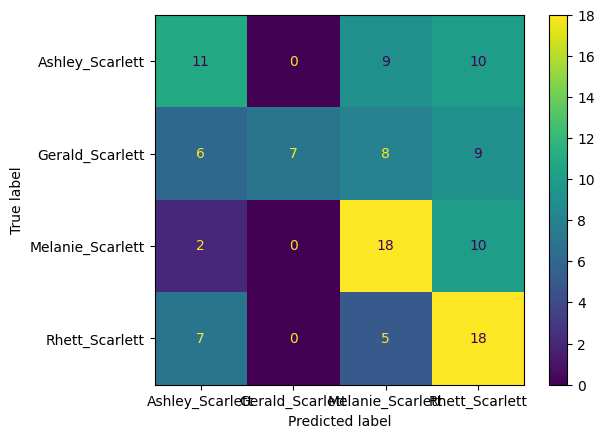

{'accuracy': 0.45, 'recall': 0.45, 'precision': 0.45, 'f1': 0.43826342576342575}


In [219]:
df_test['prediction'] = y_pred
plot_accuracy(df_test, default_metrics)

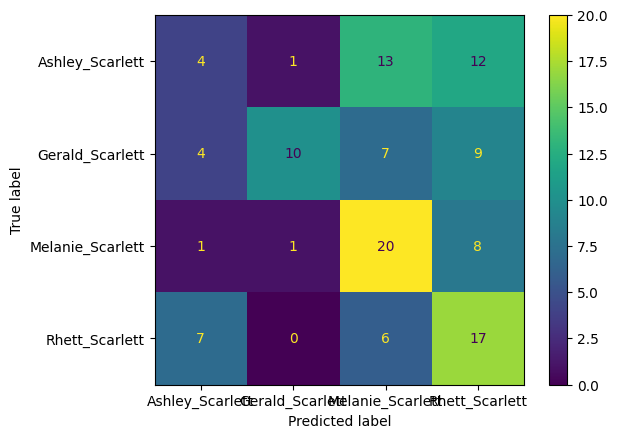

{'accuracy': 0.425, 'recall': 0.425, 'precision': 0.425, 'f1': 0.40594693254876313}


In [137]:
df_test['prediction'] = y_pred
plot_accuracy(df_test, default_metrics)

In [138]:
df_test[(df_test['characters'] == "Ashley_Scarlett") & (df_test['prediction'] == "Rhett_Scarlett")]

characters                                              Chunk  \
415  Ashley_Scarlett  manager offered half interest told already mad...   
185  Ashley_Scarlett  father nearly came today pa pa going war cours...   
627  Ashley_Scarlett  afraid people say long right never felt convic...   
584  Ashley_Scarlett                             believe anything wrong   
201  Ashley_Scarlett  think like varmint known dyed in the wool varm...   
449  Ashley_Scarlett  plenty stock bank yes interested honest enterp...   
421  Ashley_Scarlett  talked going new york thought nothing atlanta ...   
668  Ashley_Scarlett  love wear ley never really loved ley certainly...   
436  Ashley_Scarlett  make things much harder ley surely things coul...   
38   Ashley_Scarlett  let hot headed let war misery world caused war...   
426  Ashley_Scarlett  ston hood put hood command instead ston talk a...   
649  Ashley_Scarlett                 finally got yet wants speak doctor   

         prediction  
415  Rhett_Scarlett  
185  Rhett_Scarlett  
627  Rhett_Scarlett  
584  Rhett_Scarlett  
201  Rhett_Scarlett  
449  Rhett_Scarlett  
421  Rhett_Scarlett  
668  Rhett_Scarlett  
436  Rhett_Scarlett  
38   Rhett_Scarlett  
426  Rhett_Scarlett  
649  Rhett_Scarlett

In [139]:
df_test = df_test.reset_index()

In [140]:
eli5.show_prediction(logregfinal, X_test[5], top =20, feature_names = vectorizer.get_feature_names_out())

In [141]:
import numpy as np

In [142]:
t = X_test[5].toarray()
np.array(vectorizer.get_feature_names_out())[np.where(t != 0)[1]]

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [ ]:
df_test.loc[5, 'Chunk']

## 8. Sentiment Analysis Regression

In [ ]:
from transformers import pipeline
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("lxyuan/distilbert-base-multilingual-cased-sentiments-student", max_length = 512, truncation = True)

distilled_student_sentiment_classifier = pipeline(
    model="lxyuan/distilbert-base-multilingual-cased-sentiments-student",
    tokenizer = tokenizer,
    return_all_scores=True
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/373 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/759 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
tokenizer_kwargs = {'truncation':True,'max_length':512}
def sentiment_analysis_score(text):
    sentiment_results = distilled_student_sentiment_classifier(text, **tokenizer_kwargs)
    positive_score = sentiment_results[0][0]['score']
    negative_score = sentiment_results[0][2]['score']
    return positive_score - negative_score

In [ ]:
df_main_chunked['sent_score'] = df_main_chunked['Chunk'].apply(sentiment_analysis_score)

In [ ]:
df_main_chunked.groupby(['characters']).agg({'sent_score': 'mean'})

sent_score
characters                  
Ashley_Scarlett    -0.086530
Gerald_Scarlett    -0.137035
Melanie_Scarlett   -0.063165
Rhett_Scarlett     -0.111630

In [ ]:
y_train_sent = df_main_chunked['sent_score'][df_main_chunked.index.isin(df_train.index)]
y_test_sent = df_main_chunked['sent_score'][df_main_chunked.index.isin(df_test.index)]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators=100, random_state=42)
RF_model.fit(X_train, y_train_sent)

RandomForestRegressor(random_state=42)

In [ ]:
import numpy as np
importances = RF_model.feature_importances_
feature_names = vectorizer.get_feature_names_out()  # Assuming X is a DataFrame and columns represent feature names

# Sort feature importances in descending order
indices = np.argsort(importances)

# Top 20 features
top_indices = indices[-20:]

# Bottom 20 features
bottom_indices = indices[:20]

# Print the top 20 feature ranking
print("Top 20 most important features:")
for i, idx in enumerate(top_indices[::-1]):
    print(f"{i + 1}. Feature '{feature_names[idx]}': {importances[idx]}")

# Print the bottom 20 feature ranking
print("\nBottom 20 least important features:")
for i, idx in enumerate(bottom_indices):
    print(f"{i + 1}. Feature '{feature_names[idx]}': {importances[idx]}")

Top 20 most important features:
1. Feature 'never': 0.0340895262086077
2. Feature 'ley': 0.017722968743492266
3. Feature 'go': 0.015528879803041396
4. Feature 'things': 0.014461860668237752
5. Feature 'get': 0.012943230035078824
6. Feature 'army': 0.012111816190641427
7. Feature 'think': 0.011877907935164838
8. Feature 'darling': 0.011323184956271458
9. Feature 'well': 0.010897497902483693
10. Feature 'take': 0.010830851453040856
11. Feature 'another': 0.01076050424991058
12. Feature 'like': 0.010238271040168567
13. Feature 'much': 0.009823271445228425
14. Feature 'away': 0.0091900164283127
15. Feature 'old': 0.009074657619884153
16. Feature 'let': 0.008628593478678228
17. Feature 'wife': 0.008272889110790436
18. Feature 'keep': 0.008237120699898928
19. Feature 'home': 0.008183173956748878
20. Feature 'ragamuffin': 0.008182572461266309

Bottom 20 least important features:
1. Feature 'ability': 0.0
2. Feature 'mills mules': 0.0
3. Feature 'mills mules build': 0.0
4. Feature 'mills told'

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_true and y_pred are the true and predicted target values, respectively
# Compute Mean Absolute Error (MAE)
y_pred_sent = RF_model.predict(X_test)
mae = mean_absolute_error(y_test_sent, y_pred_sent)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test_sent, y_pred_sent)

# Compute Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test_sent, y_pred_sent, squared=False)

# Compute R-squared (R2)
r2 = r2_score(y_test_sent, y_pred_sent)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 0.6585813192899029
Mean Squared Error (MSE): 0.5279643946912916
Root Mean Squared Error (RMSE): 0.7266115844736386
R-squared (R2): -0.33647179607928335


## 9. LDA

Melanie_Scarlett

In [148]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Assuming you have a DataFrame named combined_df_Melanie with 'text_out_processed' column
texts = combined_df_Melanie['text_out_processed'].apply(lambda x: x.split())

all_topics = []

# Iterate through each row and apply LDA
for text in texts:
    # Create a dictionary from the preprocessed data
    dictionary = Dictionary([text])

    # Convert the preprocessed text data into bag-of-words format
    bow_corpus = [dictionary.doc2bow(text)]

    # Train the LDA model
    num_topics = 5
    ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

    # Get the topics
    topics = ldamodel.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)

    # Extract top words for each topic
    text_topics = []
    for topic_id, topic in topics:
        text_topics.append([word for word, _ in topic])

    all_topics.append(text_topics)

# Print the topics for each text
for idx, topics in enumerate(all_topics):
    print(f"Text {idx + 1} Topics:")
    for topic_id, topic_words in enumerate(topics):
        print(f"Topic {topic_id + 1}: {topic_words}")


# Visualize topics using PyLDAvis
!pip install pyldavis==3.2.1
# First, install or upgrade PyLDAvis and Gensim
!pip install --upgrade pyldavis gensim

# Then, import and use PyLDAvis
import pyLDAvis.gensim
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

# Prepare visualization
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

Text 1 Topics:
Topic 1: ['honey', 'miss', 'know', 'got', 'get', 'little', 'want', 'home', 'lace', 'things']
Topic 2: ['know', 'mr', 'get', 'think', 'little', 'things', 'home', 'want', 'honey', 'miss']
Topic 3: ['know', 'things', 'little', 'think', 'want', 'home', 'got', 'mr', 'miss', 'honey']
Topic 4: ['know', 'get', 'got', 'home', 'think', 'miss', 'want', 'mr', 'honey', 'things']
Topic 5: ['know', 'things', 'mr', 'little', 'honey', 'want', 'miss', 'home', 'get', 'got']
Text 2 Topics:
Topic 1: ['think', 'well', 'go', 'hospital', 'darling', 'must', 'mrs', 'know', 'home', 'like']
Topic 2: ['think', 'well', 'hospital', 'go', 'quite', 'must', 'mrs', 'know', 'gentlemen', 'home']
Topic 3: ['think', 'hospital', 'well', 'quite', 'go', 'know', 'must', 'mrs', 'lady', 'dear']
Topic 4: ['mrs', 'go', 'well', 'quite', 'hospital', 'think', 'lead', 'like', 'must', 'minute']
Topic 5: ['think', 'know', 'must', 'go', 'hospital', 'mrs', 'well', 'quite', 'enough', 'like']
Text 3 Topics:
Topic 1: ['dear', '

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.065544 -0.081863       1        1  51.812188
4     -0.118434 -0.016588       2        1  31.546162
2      0.010394 -0.024026       3        1   9.185430
1      0.041385  0.087269       4        1   7.455193
3      0.001112  0.035208       5        1   0.001027, topic_info=       Term       Freq      Total Category  logprob  loglift
49      ley  25.000000  25.000000  Default  30.0000  30.0000
102   would  27.000000  27.000000  Default  29.0000  29.0000
61    never  14.000000  14.000000  Default  28.0000  28.0000
83    think  32.000000  32.000000  Default  27.0000  27.0000
42     home  25.000000  25.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
191    look   0.000029  15.945234   Topic5  -7.0326  -1.7374
306     die   0.000029  14.780893   Topic5  -7.0326  -1.6616
26     even   0.000029  12.167616   Topic5  -7.0327  -1.4671
601  forget   0.000029   8.004605   Topic5  -7.0327  -1.0484
66   people   0.000029   9.492807   Topic5  -7.0327  -1.2190

[360 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
1058      4  0.939966     afternoon
884       3  0.896319           ain
107       2  0.909894  announcement
6         1  0.521994       anybody
6         4  0.521994       anybody
...     ...       ...           ...
719       3  0.896343          yell
584       1  0.637589           yes
584       2  0.191277           yes
584       3  0.127518           yes
584       4  0.063759           yes

[418 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 3, 2, 4])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


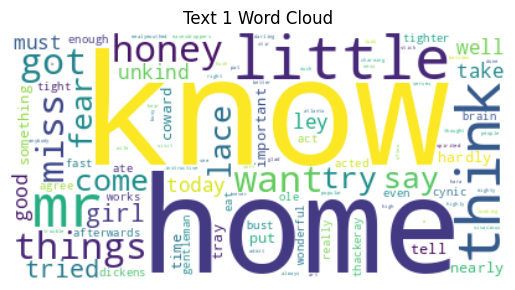

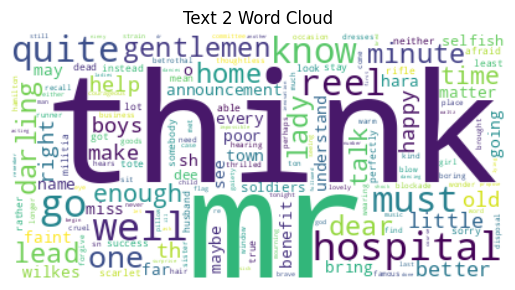

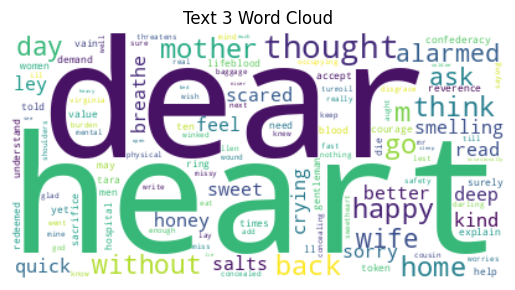

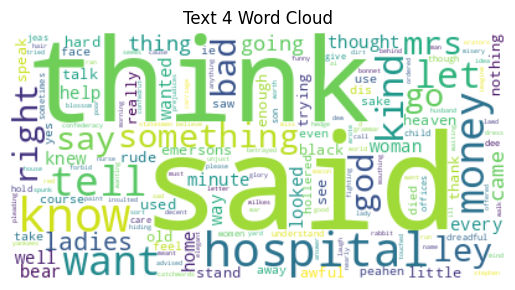

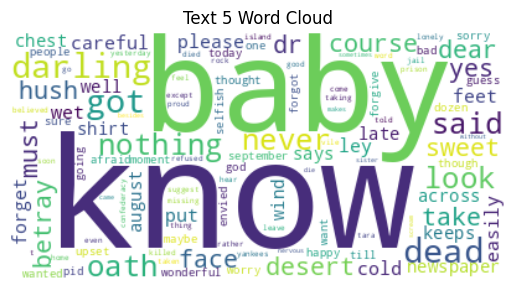

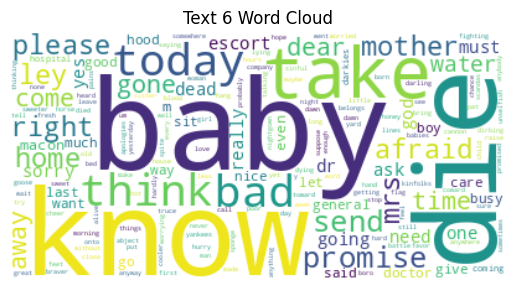

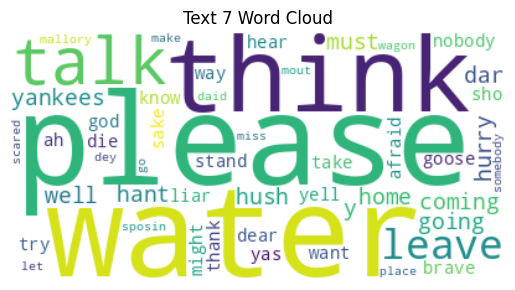

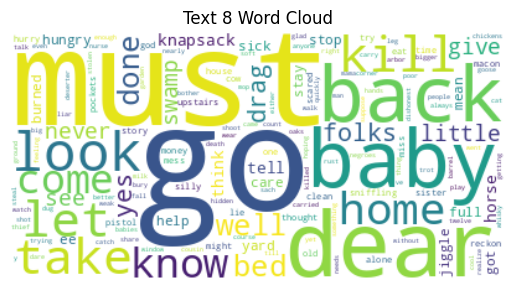

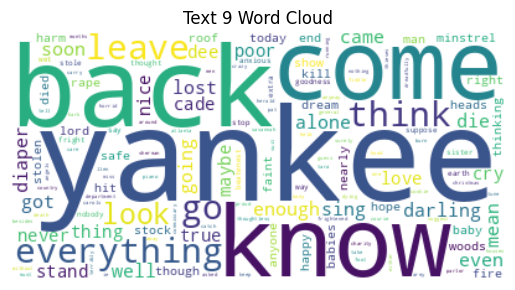

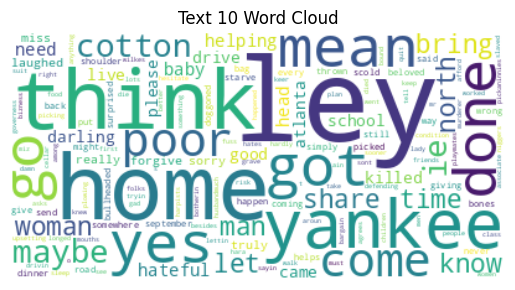

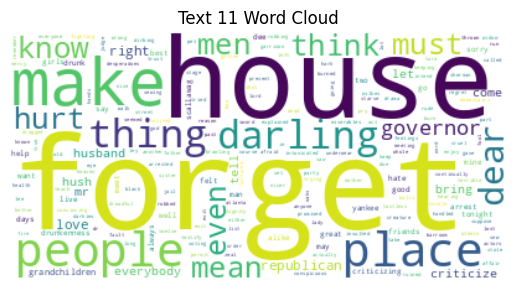

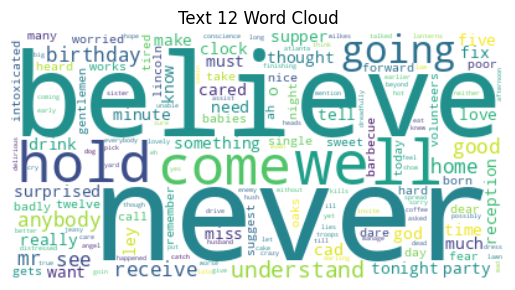

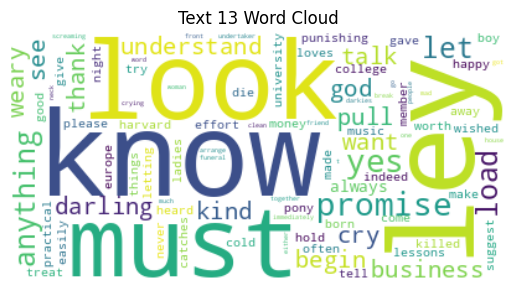

In [149]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named combined_df_Melanie with 'text_out_processed' column
texts = combined_df_Melanie['text_out_processed'].apply(lambda x: x.split())

# Iterate through each text and apply LDA
for idx, text in enumerate(texts):
    # Create a dictionary from the preprocessed data
    dictionary = Dictionary([text])

    # Convert the preprocessed text data into bag-of-words format
    bow_corpus = [dictionary.doc2bow(text)]

    # Train the LDA model
    num_topics = 5
    ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

    # Get the topics
    topics = ldamodel.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)

    # Extract top words for each topic
    topic_words = []
    for topic_id, topic in topics:
        topic_words.extend([word for word, _ in topic])

    # Generate word cloud for the text
    wordcloud = WordCloud(background_color='white').generate(' '.join(text))
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Text {idx + 1} Word Cloud')
    plt.axis('off')
    plt.show()

Gerald_Scarlett

In [150]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Assuming you have a DataFrame named combined_df_Melanie with 'text_out_processed' column
texts = combined_df_Gerald['text_out_processed'].apply(lambda x: x.split())

all_topics = []

# Iterate through each row and apply LDA
for text in texts:
    # Create a dictionary from the preprocessed data
    dictionary = Dictionary([text])

    # Convert the preprocessed text data into bag-of-words format
    bow_corpus = [dictionary.doc2bow(text)]

    # Train the LDA model
    num_topics = 5
    ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

    # Get the topics
    topics = ldamodel.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)

    # Extract top words for each topic
    text_topics = []
    for topic_id, topic in topics:
        text_topics.append([word for word, _ in topic])

    all_topics.append(text_topics)

# Print the topics for each text
for idx, topics in enumerate(all_topics):
    print(f"Text {idx + 1} Topics:")
    for topic_id, topic_words in enumerate(topics):
        print(f"Topic {topic_id + 1}: {topic_words}")

# Visualize topics using PyLDAvis
!pip install pyldavis==3.2.1
# First, install or upgrade PyLDAvis and Gensim
!pip install --upgrade pyldavis gensim

# Then, import and use PyLDAvis
import pyLDAvis.gensim
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

# Prepare visualization
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text 1 Topics:
Topic 1: ['marry', 'like', 'come', 'ley', 'would', 'daughter', 'pa', 's', 'well', 'wilkes']
Topic 2: ['marry', 'like', 'come', 'ley', 'well', 'would', 'daughter', 's', 'queer', 'miss']
Topic 3: ['like', 'would', 'marry', 'ley', 'daughter', 'wilkes', 'come', 'well', 's', 'miss']
Topic 4: ['like', 'marry', 'ley', 'would', 'wilkes', 'daughter', 'pa', 'nothing', 'come', 'man']
Topic 5: ['like', 'ley', 'marry', 'come', 'wilkes', 's', 'daughter', 'would', 'child', 'say']
Text 2 Topics:
Topic 1: ['cry', 'man', 'tara', 'like', 'puss', 'sumter', 'forget', 'god', 'know', 'could']
Topic 2: ['man', 'cry', 'look', 'like', 'could', 'teach', 'lament', 'around', 'pa', 'make']
Topic 3: ['cry', 'man', 'look', 'like', 'lick', 'see', 'mr', 'around', 'pa', 'young']
Topic 4: ['man', 'cry', 'like', 'look', 'tara', 'know', 'war', 'course', 'orangeman', 'teach']
Topic 5: ['cry', 'man', 'look', 'like', 'right', 'soon', 'see', 'get', 'orangeman', 'lick']
Text 3 Topics:
Topic 1: ['mother', 'home', 

  Using cached pyLDAvis-3.4.1-py3-none-any.whl (2.6 MB)
  Attempting uninstall: pyldavis
    Found existing installation: pyLDAvis 3.2.1
    Uninstalling pyLDAvis-3.2.1:
      Successfully uninstalled pyLDAvis-3.2.1


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.083542 -0.035539       1        1  72.627672
4     -0.115349 -0.020581       2        1  27.362149
0      0.010630  0.018849       3        1   0.003859
1      0.010582  0.018716       4        1   0.003392
3      0.010595  0.018555       5        1   0.002929, topic_info=       Term       Freq      Total Category  logprob  loglift
156     ley   9.000000   9.000000  Default  30.0000  30.0000
178   marry   9.000000   9.000000  Default  29.0000  29.0000
191  mother  21.000000  21.000000  Default  28.0000  28.0000
157    like  19.000000  19.000000  Default  27.0000  27.0000
215   orrow   5.000000   5.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
520     die   0.000059   3.689621   Topic5  -6.6051  -0.6108
198   never   0.000059   6.326820   Topic5  -6.6052  -1.1502
521    died   0.000059   2.810621   Topic5  -6.6053  -0.3389
137   irish   0.000059   3.837663   Topic5  -6.6055  -0.6505
131   house   0.000059   7.345187   Topic5  -6.6056  -1.2999

[351 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
482       2  0.949311      acted
483       2  0.949322     almost
6         1  1.060061     always
12        1  1.013809     around
484       2  0.949340    assured
...     ...       ...        ...
338       2  0.323688    yankees
340       1  1.042200        yes
647       2  0.949342  yesterday
342       1  0.754722      young
342       2  0.377361      young

[246 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 1, 2, 4])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


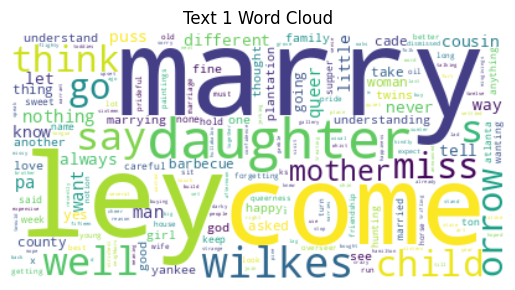

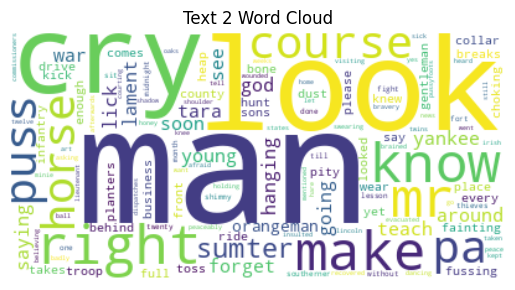

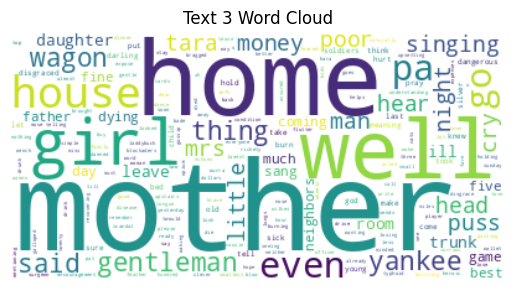

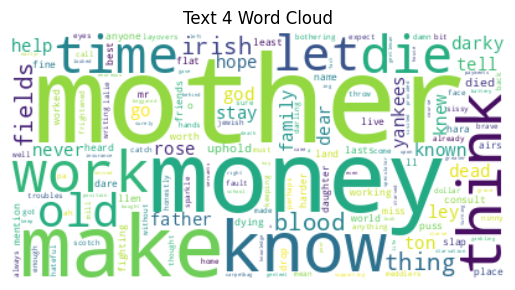

In [151]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named combined_df_Melanie with 'text_out_processed' column
texts = combined_df_Gerald['text_out_processed'].apply(lambda x: x.split())

# Iterate through each text and apply LDA
for idx, text in enumerate(texts):
    # Create a dictionary from the preprocessed data
    dictionary = Dictionary([text])

    # Convert the preprocessed text data into bag-of-words format
    bow_corpus = [dictionary.doc2bow(text)]

    # Train the LDA model
    num_topics = 5
    ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

    # Get the topics
    topics = ldamodel.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)

    # Extract top words for each topic
    topic_words = []
    for topic_id, topic in topics:
        topic_words.extend([word for word, _ in topic])

    # Generate word cloud for the text
    wordcloud = WordCloud(background_color='white').generate(' '.join(text))
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Text {idx + 1} Word Cloud')
    plt.axis('off')
    plt.show()

Ashley_Scarlett

In [152]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Assuming you have a DataFrame named combined_df_Melanie with 'text_out_processed' column
texts = combined_df_Ashley['text_out_processed'].apply(lambda x: x.split())

all_topics = []

# Iterate through each row and apply LDA
for text in texts:
    # Create a dictionary from the preprocessed data
    dictionary = Dictionary([text])

    # Convert the preprocessed text data into bag-of-words format
    bow_corpus = [dictionary.doc2bow(text)]

    # Train the LDA model
    num_topics = 5
    ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

    # Get the topics
    topics = ldamodel.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)

    # Extract top words for each topic
    text_topics = []
    for topic_id, topic in topics:
        text_topics.append([word for word, _ in topic])

    all_topics.append(text_topics)

# Print the topics for each text
for idx, topics in enumerate(all_topics):
    print(f"Text {idx + 1} Topics:")
    for topic_id, topic_words in enumerate(topics):
        print(f"Topic {topic_id + 1}: {topic_words}")

# Visualize topics using PyLDAvis
!pip install pyldavis==3.2.1
# First, install or upgrade PyLDAvis and Gensim
!pip install --upgrade pyldavis gensim

# Then, import and use PyLDAvis
import pyLDAvis.gensim
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

# Prepare visualization
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text 1 Topics:
Topic 1: ['thinks', 'love', 'till', 'know', 'day', 'could', 'knew', 'let', 'well', 'probably']
Topic 2: ['love', 'thinks', 'till', 'knew', 'let', 'know', 'could', 'think', 'probably', 'wars']
Topic 3: ['love', 'thinks', 'knew', 'let', 'know', 'till', 'think', 'marry', 'day', 'probably']
Topic 4: ['love', 'thinks', 'let', 'know', 'knew', 'till', 'wars', 'well', 'could', 'marry']
Topic 5: ['love', 'let', 'thinks', 'till', 'know', 'knew', 'think', 'could', 'wars', 'day']
Text 2 Topics:
Topic 1: ['like', 'know', 'war', 'life', 'love', 'would', 'first', 'old', 'dear', 'gone']
Topic 2: ['like', 'would', 'life', 'know', 'love', 'war', 'first', 'well', 'old', 'home']
Topic 3: ['like', 'life', 'know', 'love', 'first', 'would', 'war', 'could', 'well', 'dear']
Topic 4: ['like', 'life', 'war', 'love', 'dear', 'know', 'well', 'first', 'came', 'mrs']
Topic 5: ['like', 'life', 'know', 'love', 'would', 'first', 'dear', 'gone', 'nothing', 'father']
Text 3 Topics:
Topic 1: ['ley', 'know',

  Using cached pyLDAvis-3.4.1-py3-none-any.whl (2.6 MB)
  Attempting uninstall: pyldavis
    Found existing installation: pyLDAvis 3.2.1
    Uninstalling pyLDAvis-3.2.1:
      Successfully uninstalled pyLDAvis-3.2.1


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.079622 -0.079720       1        1  43.257193
2     -0.118385  0.017517       2        1  28.449504
1      0.076739  0.100309       3        1  28.288770
0     -0.019014 -0.019036       4        1   0.002685
4     -0.018963 -0.019071       5        1   0.001848, topic_info=         Term       Freq      Total Category  logprob  loglift
341      life  12.000000  12.000000  Default  30.0000  30.0000
116      back  12.000000  12.000000  Default  29.0000  29.0000
594  anything  13.000000  13.000000  Default  28.0000  28.0000
212      even   7.000000   7.000000  Default  27.0000  27.0000
761       say  11.000000  11.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
417    people   0.000045  12.560441   Topic5  -7.1635  -1.6379
532    things   0.000045  12.494996   Topic5  -7.1636  -1.6328
292      home   0.000045  11.076991   Topic5  -7.1636  -1.5123
88    without   0.000045  10.235581   Topic5  -7.1636  -1.4334
3      always   0.000045  12.426034   Topic5  -7.1636  -1.6273

[356 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
1210      3  0.798377           abuses
94        2  0.985490  accomplishments
103       2  0.670635           afraid
103       3  0.268254           afraid
105       2  0.558733               ah
...     ...       ...              ...
813       3  0.770618            wrong
1296      3  0.798368          wronged
92        1  0.634332              yes
92        2  0.211444              yes
92        3  0.211444              yes

[376 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 1, 5])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


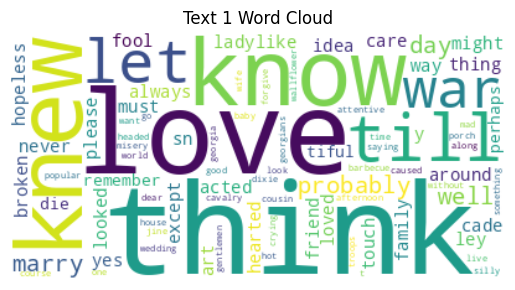

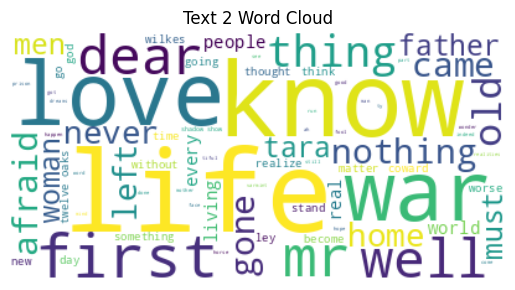

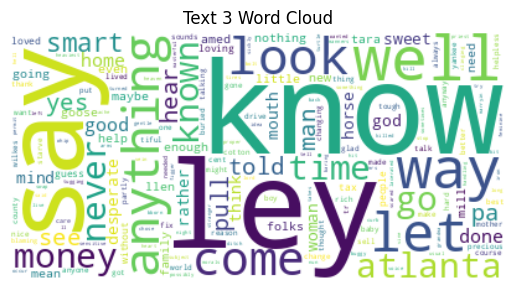

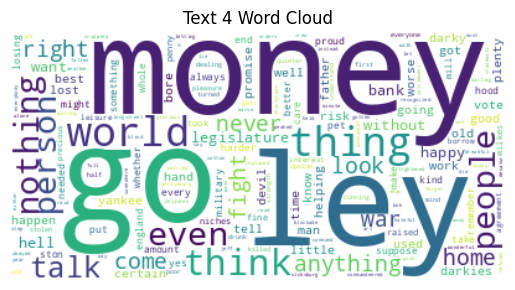

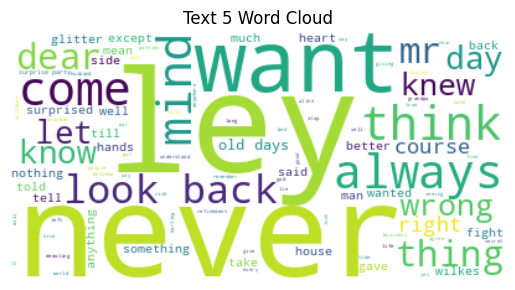

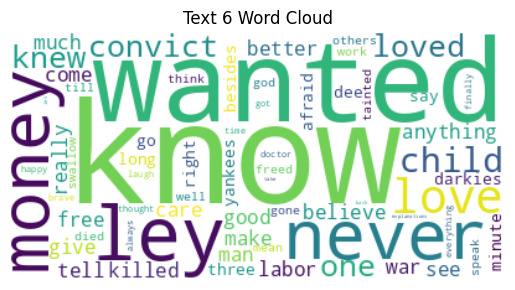

In [153]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named combined_df_Melanie with 'text_out_processed' column
texts = combined_df_Ashley['text_out_processed'].apply(lambda x: x.split())

# Iterate through each text and apply LDA
for idx, text in enumerate(texts):
    # Create a dictionary from the preprocessed data
    dictionary = Dictionary([text])

    # Convert the preprocessed text data into bag-of-words format
    bow_corpus = [dictionary.doc2bow(text)]

    # Train the LDA model
    num_topics = 5
    ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

    # Get the topics
    topics = ldamodel.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)

    # Extract top words for each topic
    topic_words = []
    for topic_id, topic in topics:
        topic_words.extend([word for word, _ in topic])

    # Generate word cloud for the text
    wordcloud = WordCloud(background_color='white').generate(' '.join(text))
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Text {idx + 1} Word Cloud')
    plt.axis('off')
    plt.show()

Rhett_Scarlett

In [154]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Assuming you have a DataFrame named combined_df_Melanie with 'text_out_processed' column
texts = combined_df_Rhett['text_out_processed'].apply(lambda x: x.split())

all_topics = []

# Iterate through each row and apply LDA
for text in texts:
    # Create a dictionary from the preprocessed data
    dictionary = Dictionary([text])

    # Convert the preprocessed text data into bag-of-words format
    bow_corpus = [dictionary.doc2bow(text)]

    # Train the LDA model
    num_topics = 5
    ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

    # Get the topics
    topics = ldamodel.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)

    # Extract top words for each topic
    text_topics = []
    for topic_id, topic in topics:
        text_topics.append([word for word, _ in topic])

    all_topics.append(text_topics)

# Print the topics for each text
for idx, topics in enumerate(all_topics):
    print(f"Text {idx + 1} Topics:")
    for topic_id, topic_words in enumerate(topics):
        print(f"Topic {topic_id + 1}: {topic_words}")

# Visualize topics using PyLDAvis
!pip install pyldavis==3.2.1
# First, install or upgrade PyLDAvis and Gensim
!pip install --upgrade pyldavis gensim

# Then, import and use PyLDAvis
import pyLDAvis.gensim
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

# Prepare visualization
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text 1 Topics:
Topic 1: ['money', 'one', 'never', 'think', 'england', 'like', 'enough', 'long', 'anything', 'mercenary']
Topic 2: ['never', 'money', 'one', 'think', 'like', 'england', 'long', 'would', 'get', 'bonnet']
Topic 3: ['money', 'never', 'like', 'get', 'bonnet', 'think', 'anything', 'tell', 'one', 'long']
Topic 4: ['like', 'think', 'money', 'one', 'never', 'tell', 'well', 'would', 'get', 'could']
Topic 5: ['like', 'never', 'think', 'long', 'would', 'bonnet', 'one', 'must', 'give', 'enough']
Text 2 Topics:
Topic 1: ['yankees', 'go', 'home', 'going', 'would', 'get', 'let', 'horse', 'think', 'road']
Topic 2: ['yankees', 'go', 'home', 'going', 'would', 'get', 'see', 'good', 'road', 'tara']
Topic 3: ['going', 'go', 'home', 'would', 'yankees', 'let', 'good', 'like', 'get', 'men']
Topic 4: ['yankees', 'go', 'home', 'would', 'get', 'going', 'let', 'like', 'see', 'army']
Topic 5: ['yankees', 'go', 'home', 'going', 'would', 'get', 'see', 'good', 'like', 'let']
Text 3 Topics:
Topic 1: ['m

  Using cached pyLDAvis-3.4.1-py3-none-any.whl (2.6 MB)
  Attempting uninstall: pyldavis
    Found existing installation: pyLDAvis 3.2.1
    Uninstalling pyLDAvis-3.2.1:
      Successfully uninstalled pyLDAvis-3.2.1


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.040423 -0.037032       1        1  36.948244
3      0.080174 -0.070649       2        1  27.848113
2     -0.092302 -0.014728       3        1  24.645993
0      0.045692  0.050686       4        1  10.556476
4      0.006858  0.071724       5        1   0.001174, topic_info=       Term       Freq      Total Category  logprob  loglift
266    know  58.000000  58.000000  Default  30.0000  30.0000
278     ley  23.000000  23.000000  Default  29.0000  29.0000
558   would  52.000000  52.000000  Default  28.0000  28.0000
282    like  71.000000  71.000000  Default  27.0000  27.0000
1334  sorry   9.000000   9.000000  Default  26.0000  26.0000
...     ...        ...        ...      ...      ...      ...
713   house   0.000037  18.928405   Topic5  -7.6843  -1.7808
95     come   0.000037  25.260636   Topic5  -7.6844  -2.0695
193    fool   0.000037  15.000794   Topic5  -7.6844  -1.5483
271    last   0.000037  20.549263   Topic5  -7.6845  -1.8631
325    miss   0.000037  13.374253   Topic5  -7.6845  -1.4336

[367 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1890      4  0.804727  affect
2011      4  0.804785   afire
573       3  0.998263     air
1424      2  0.889761   alive
1891      4  0.804728    amos
...     ...       ...     ...
1937      4  0.421681   years
564       1  0.446800     yes
564       2  0.240585     yes
564       3  0.171846     yes
564       4  0.137477     yes

[498 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 1, 5])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


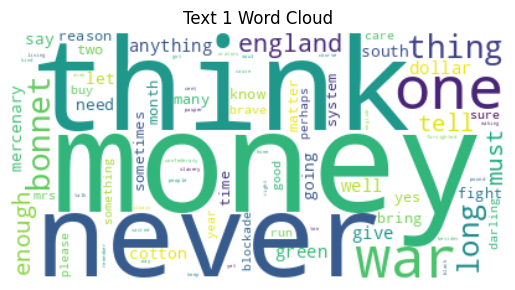

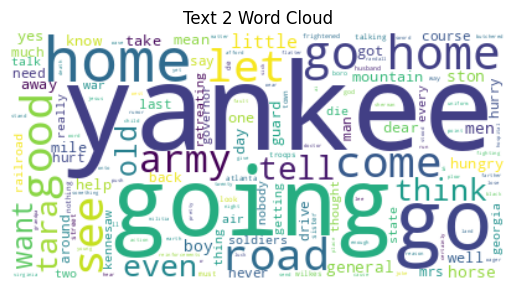

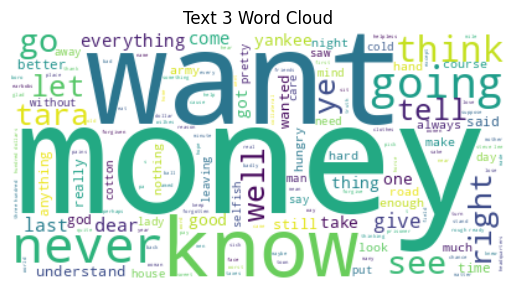

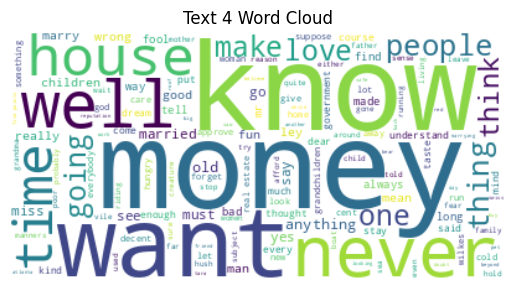

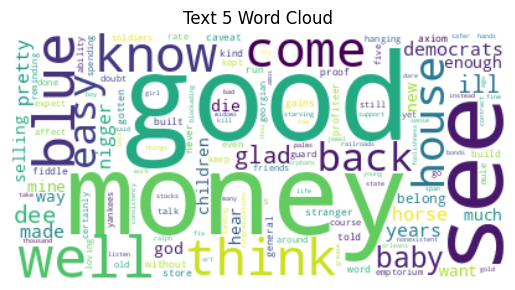

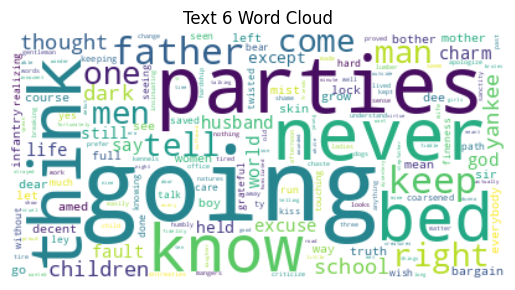

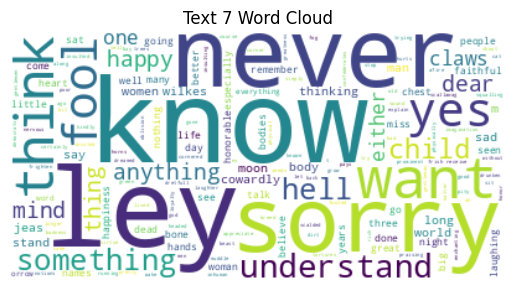

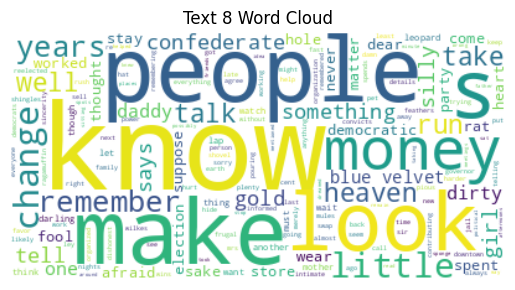

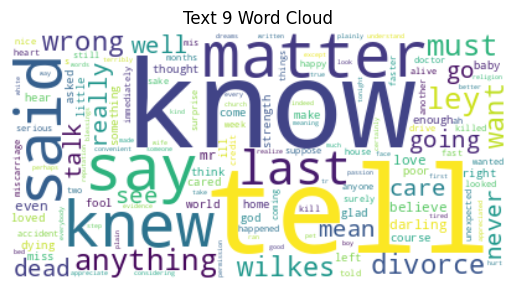

In [155]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named combined_df_Melanie with 'text_out_processed' column
texts = combined_df_Rhett['text_out_processed'].apply(lambda x: x.split())

# Iterate through each text and apply LDA
for idx, text in enumerate(texts):
    # Create a dictionary from the preprocessed data
    dictionary = Dictionary([text])

    # Convert the preprocessed text data into bag-of-words format
    bow_corpus = [dictionary.doc2bow(text)]

    # Train the LDA model
    num_topics = 5
    ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

    # Get the topics
    topics = ldamodel.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)

    # Extract top words for each topic
    topic_words = []
    for topic_id, topic in topics:
        topic_words.extend([word for word, _ in topic])

    # Generate word cloud for the text
    wordcloud = WordCloud(background_color='white').generate(' '.join(text))
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Text {idx + 1} Word Cloud')
    plt.axis('off')
    plt.show()